In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("car data.csv")
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
Car_Name         301 non-null object
Year             301 non-null int64
Selling_Price    301 non-null float64
Present_Price    301 non-null float64
Kms_Driven       301 non-null int64
Fuel_Type        301 non-null object
Seller_Type      301 non-null object
Transmission     301 non-null object
Owner            301 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.2+ KB


In [4]:
data.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [5]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [6]:
data.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [7]:
data.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [8]:
data.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data['Fuel_Type'] = LE.fit_transform(data['Fuel_Type'])
data['Transmission'] = LE.fit_transform(data['Transmission'])
data['Seller_Type'] = LE.fit_transform(data['Seller_Type'])
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [10]:
data.Owner.value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

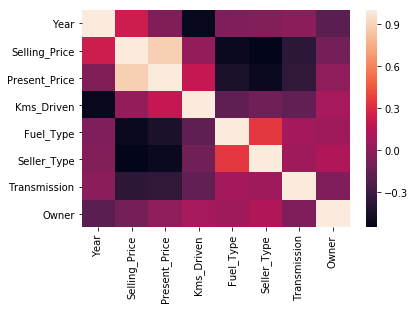

In [11]:
sns.heatmap(data.corr())

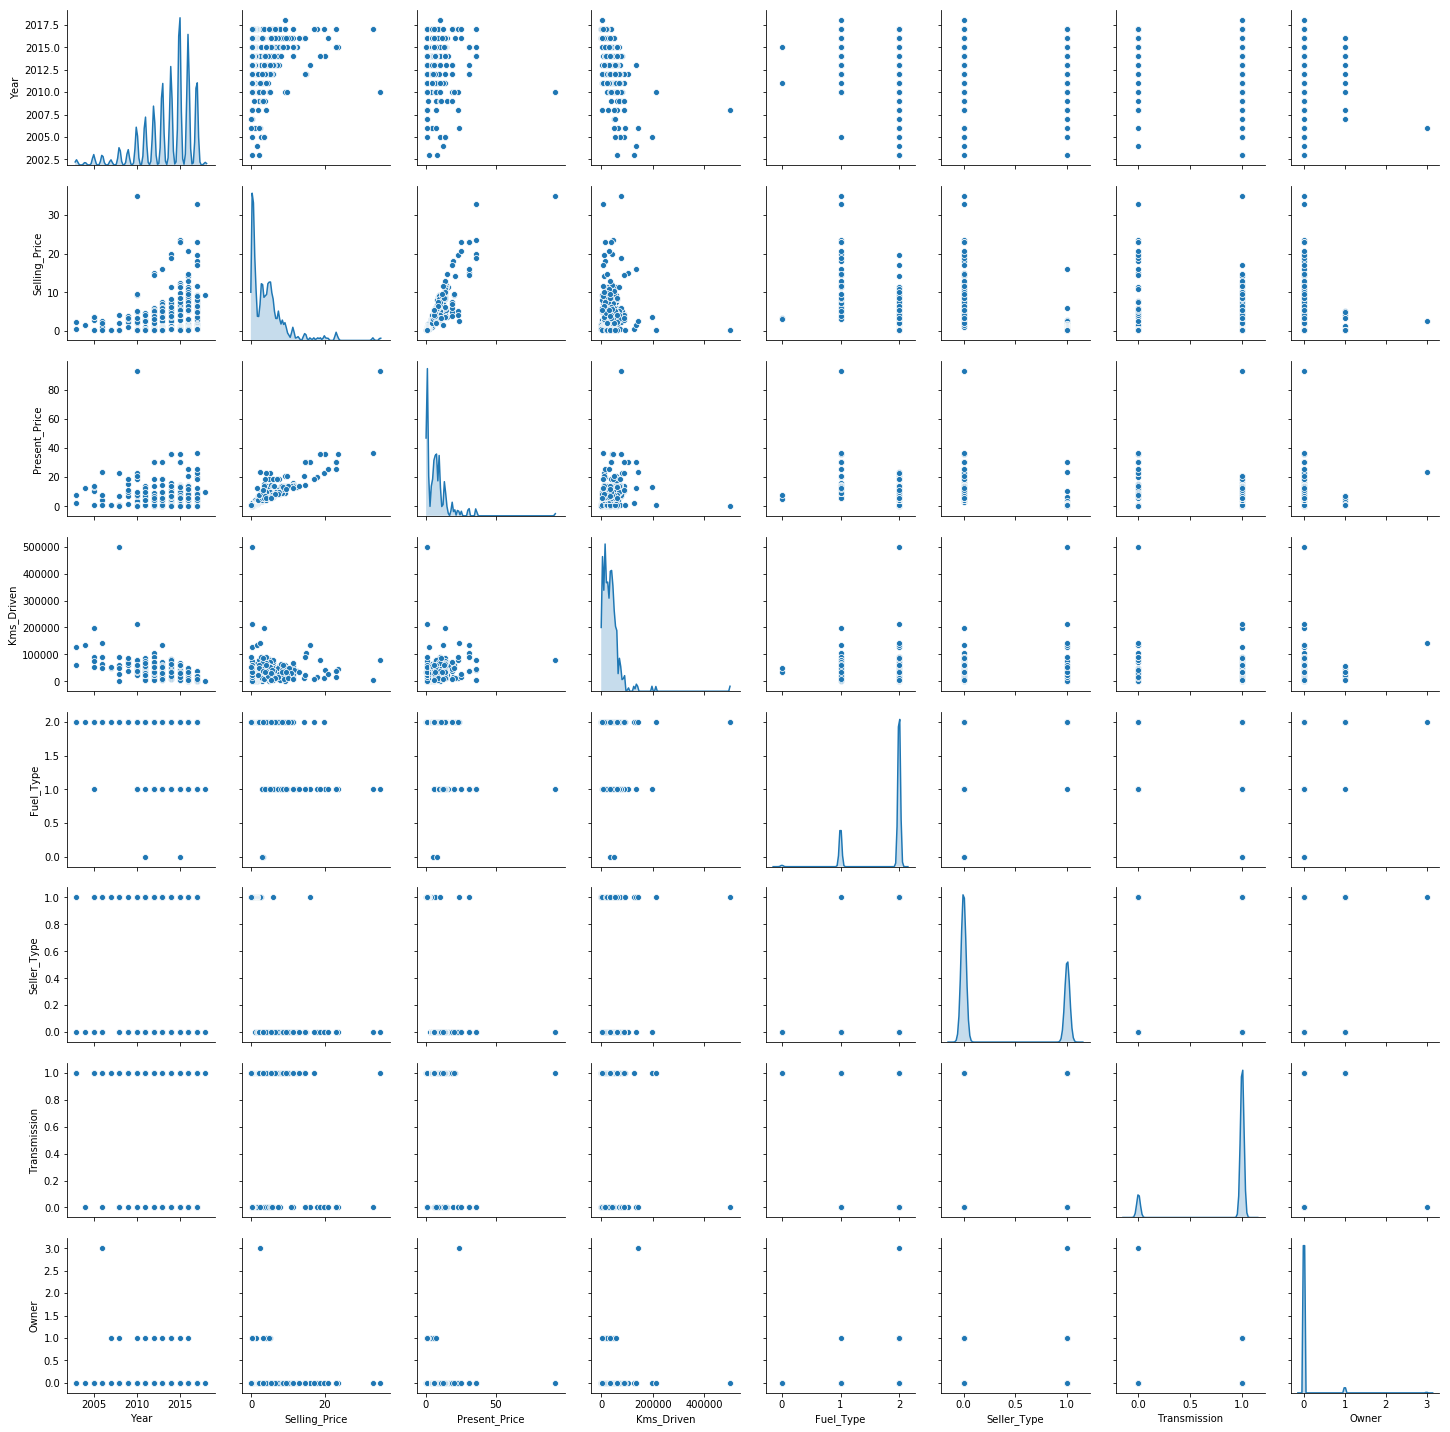

In [12]:
sns.pairplot(data,diag_kind="kde", diag_kws=dict(shade=True, bw=.05, vertical=False))

In [13]:
X = data.drop(["Selling_Price","Car_Name"],axis=1)
Y = data[["Selling_Price"]]

In [14]:
X.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,2,0,1,0
1,2013,9.54,43000,1,0,1,0
2,2017,9.85,6900,2,0,1,0
3,2011,4.15,5200,2,0,1,0
4,2014,6.87,42450,1,0,1,0


In [15]:
Y.head()

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60


In [16]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.2 , random_state = 11)

In [17]:
X_train.shape

(240, 7)

In [18]:
X_test.shape

(61, 7)

In [19]:
Y_train.shape

(240, 1)

In [20]:
Y_test.shape

(61, 1)

In [21]:
X_train

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
159,2017,0.510,4000,2,1,0,0
44,2012,2.690,50000,2,0,1,0
254,2013,9.900,54242,2,0,1,0
97,2017,18.640,8700,2,0,1,0
123,2013,1.470,46500,2,1,1,0
218,2014,9.400,45078,2,0,1,0
258,2015,13.600,25000,2,0,1,0
267,2016,9.400,19434,1,0,1,0
3,2011,4.150,5200,2,0,1,0
55,2009,15.040,70000,2,0,0,0


In [22]:
X_test

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
150,2011,0.826,6000,2,1,1,0
12,2015,9.940,15000,2,0,0,0
294,2014,6.800,33019,2,0,1,0
295,2015,13.090,60076,1,0,1,0
60,2013,18.610,40001,2,0,1,0
101,2017,1.820,1400,2,1,1,0
189,2005,0.570,55000,2,1,1,0
128,2017,0.870,3000,2,1,1,0
241,2015,7.130,35866,2,0,1,1
39,2003,7.980,62000,2,0,1,0


In [23]:
Y_train

,Selling_Price
159,0.45
44,1.25
254,5.25
97,17.00
123,1.00
218,6.45
258,8.40
267,8.35
3,2.85
55,3.60


In [24]:
Y_test

,Selling_Price
150,0.50
12,7.50
294,3.75
295,8.55
60,6.95
101,1.70
189,0.20
128,0.80
241,4.75
39,2.25


## Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)
P = regressor.predict(X_test)

In [26]:
Y_test.shape , P.shape

((61, 1), (61, 1))

In [27]:
Pred_y = pd.DataFrame(P)
Pred_y.head()

,0
0,-0.526400
1,6.915799
2,4.219988
3,9.261737
4,10.267623


In [28]:
Y_test.head()

,Selling_Price
150,0.50
12,7.50
294,3.75
295,8.55
60,6.95


In [31]:
from sklearn.metrics import r2_score
scoreLineer = r2_score(Y_test,Pred_y,multioutput="variance_weighted")  # First R-Squared
scoreLineer

0.8294526904506477